In [1]:
import glob
import os
import numpy as np
import json
import cv2
from matplotlib import pyplot as plt
import copy 
from skimage.feature import hog
from skimage import data, exposure
import argparse


## Useful information for the project
- The file size of the CityScapes data is (1024, 2048, 3)

In [2]:
# parameters=argparse.ArgumentParser(description="Parameters for training SVM on HoG features")
# parameters.add_argument('-f','file',type=str,help='path to train data',default='./data/rawdata/leftImg8bit/train',\
#                        required=True)

# parser = argparse.ArgumentParser(description='Demo for human detection from image')
# parser.add_argument('-i', '--input', type=str, help='input file', required=True)
# parser.add_argument('-o', '--output', type=str, default='output.png', help='output file', required=True)
# parser.add_argument('-m', '--model', type=str, default='models.dat', help='the trained model file', required=True)
# args = parser.parse_args()

# inputFile = getattr(args, 'input')
# outFile = getattr(args, 'output')
# modelFile = getattr(args, 'model')

In [3]:
def image_viewer(raw_path='./data/rawdata/leftImg8bit/train/aachen',
                anno_path='./data/annotations/gtBboxCityPersons/train/aachen',
                iteration_limit=2,
                show_bbox=True):
    '''
    Function to print image and annotations 

    -------------

    Params:

    raw_path:
    anno_path:



    '''



    raw_data_file_path=raw_path
    ann_data_file_path=anno_path

    iter=1

    for filename in glob.glob(os.path.join(ann_data_file_path,"*.png")):
        ##Break the loop afte the first file for testing    
        if iter>iteration_limit:
            break        
        file_json=open(filename)
        annotation_data=json.load(file_json)
        bBoxs=[]
        for objs in annotation_data['objects']:
            if not objs['label']=='ignore':
                bBoxs.append(objs['bbox'])



        # Close the json file 
        file_json.close()

        
           
        ##Get base file namee replace with raw image data
        filename=os.path.basename(filename)
        filename=filename.replace('json','png')
        filename=filename.replace('gtBboxCityPersons','leftImg8bit')

        #Find the right file and show original an with boxes
        image_path=os.path.join(raw_data_file_path,filename)    
        fd = cv2.imread(image_path)
        fb_anno=copy.deepcopy(fd)
        for bBox in bBoxs:
            p1=(bBox[0],bBox[1])
            p2=(bBox[0]+bBox[2],bBox[1]+bBox[3])
            fb_anno=cv2.rectangle(fb_anno,p1,p2,(0,200,0),3)

        figure1=plt.figure(figsize=(25,10))
        ax1=figure1.add_subplot(211)
        ax2=figure1.add_subplot(212,sharex=ax1,sharey=ax1)

        ax1.imshow(fd)
        ax2.imshow(fb_anno)
        ax2.set(title="Ori",xlabel="X",ylabel="Y")
        ax2.set(title="Annot",xlabel="X",ylabel="Y")
        figure1.tight_layout(pad=1)       

        plt.show()


        iter+=1


    print(f"Iteration is over")


In [4]:
def HoG_viewer(raw_path='./data/rawdata/leftImg8bit/train/aachen',
                iteration_limit=3):
    
    '''
    Function to print image and annotations 

    -------------

    Params:

    raw_path: Raw image path 
    anno_path: And relative image path 



    '''
    raw_data_file_path=raw_path
    
    iter=1

    for filename in glob.glob(os.path.join(raw_data_file_path,"*.png")):
        print(f"iter in loop")

        ##Break the loop afte the first file for testing    
        if iter>iteration_limit:
            break 
        fd = cv2.imread(filename)
        fb_hog=copy.deepcopy(fd)
        hog_vis,fb_hog=hog(fb_hog,orientations=9,pixels_per_cell=(8,8),visualize=True,cells_per_block=(3,3))

          
        figure1=plt.figure(figsize=(25,10))
        ax1=figure1.add_subplot(211)
        ax2=figure1.add_subplot(212,sharex=ax1,sharey=ax1)
        print("IN")

        ax1.imshow(fd)
        ax2.imshow(fb_hog,plt.cm.gray)
        ax2.set(title="Ori",xlabel="X",ylabel="Y")
        ax2.set(title="HoG",xlabel="X",ylabel="Y")
        figure1.tight_layout(pad=1)       

        plt.show()


        iter+=1


    print(f"Iteration is over")


In [5]:
def crop_and_HoG(raw_path='./data/rawdata/leftImg8bit/train/aachen',
                anno_path='./data/annotations/gtBboxCityPersons/train/aachen',
                iteration_limit=1,
                show_bbox=True):
    '''
    Function to print image and annotations 

    -------------

    Params:

    raw_path: Patht to images raw files
    anno_path: json file paths with BBox annotations

    '''

    raw_data_file_path=raw_path
    ann_data_file_path=anno_path

    iter=1

    for filename in glob.glob(os.path.join(ann_data_file_path,"*.json")):
        ##Break the loop afte the first file for testing    
        if iter>iteration_limit:
            break        
        file_json=open(filename)
        annotation_data=json.load(file_json)
        bBoxs=[]
        for objs in annotation_data['objects']:
            if not objs['label']=='ignore':
                bBoxs.append(objs['bbox'])



        # Close the json file 
        file_json.close()

        
           
        ##Get base file namee replace with raw image data
        filename=os.path.basename(filename)
        filename=filename.replace('json','png')
        filename=filename.replace('gtBboxCityPersons','leftImg8bit')

        #Find the right file and show original an with boxes
        image_path=os.path.join(raw_data_file_path,filename)    
        fd = cv2.imread(image_path)
        assert len(fd)>0,f"Image is empty"
        
        fd_cropped=[]
        for bBox in bBoxs:
            p1=(bBox[0],bBox[1])
            p2=(bBox[0]+bBox[2],bBox[1]+bBox[3])
            fd_cropped.append(fd[p1[0]:p2[0],p1[1]:p2[1]])
            
#         fd_cropped=np.array([fd_cropped])
            
        plt.figure()    
        plt.imshow(fd)
#         print(f"fdcrop {fd_cropped.shape}")
        for crop in fd_cropped:
            plt.figure()
            plt.imshow(crop)
            print(f"in crop")
        plt.show()


        iter+=1


    print(f"Iteration is over")


In [6]:
# raw_path='./data/svm_data/positive'

# crop_and_HoG()

(1024, 2048, 3)


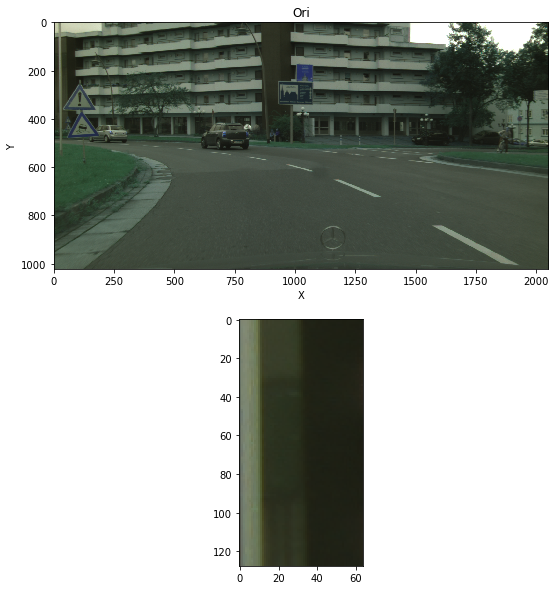

In [9]:
# raw_path='./data/svm_data/positive'

# crop_and_HoG()

aa=cv2.imread('./data/rawdata/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png')
print(aa.shape)
bb=aa[100:228,20:84]
figure1=plt.figure(figsize=(25,10))
ax1=figure1.add_subplot(211)
ax1.imshow(aa)
ax1.set(title="Ori",xlabel="X",ylabel="Y")
ax2=figure1.add_subplot(212)
ax2.imshow(bb)
plt.show()


In [8]:
!ls ./data

annotations  rawdata  svm_data
